# Obyčejné diferenciální rovnice

Naimportujeme si knihovny potřebné pro následující příklady:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

- ODR $N$-tého řádu převádíme na soustavu $N$ diferenciálních rovnic 1. řádu
- Potřebujeme  $N$ počátečních podmínek
- Řešení se liší v závislosti na počátečních podmínkách:
    1. **Počáteční problém**: všechny podmínky **jsou** zadány v jednom bodě
    2. **Okrajový problém**: všechny podmínky **nejsou** zadány v jednom bodě
    
## Runge-Kuttovy metody pro řešení počátečního problému
### Eulerova metoda
- Z Taylorova rozvoje známe směrnici tečny
- V každém bodě $x_{1},x_{2}\dots x_{n}$ aproximujeme funkci její tečnou
$$ y(x+h)\approx y(x)+h\dfrac{\mathrm{d}y(x)}{\mathrm{d}x}$$
- Metodu lze zpřesnit zmenšením vzdálenosti $h=x_{k+1}-x_{k}$

### Metoda středního bodu
- Přesnější vyjádření směrnice tečny:
    1. Provedeme poloviční krok $h/2$ pomocí Eulerovy metody
    2. V tomto bodě vypočítáme směrnici tečny
    3. Tuto směrnici použijeme k provedení celého kroku z bodu $x$ do $x+h$
$$ y(x+h)\approx y(x)+hf\left[ x+\dfrac{h}{2},y(x)+\dfrac{h}{2}f\left( x,y(x)\right) \right]   $$

### Heunova metoda
- Opět zpřesňujeme vyjádření směrnice tečny:
    1. Směrnici tečny v bodě $x+h$ určíme pomocí Eulerovy metody
    2. Uděláme průměr ze směrnic v bodech $x$ a $x+h$
    3. Tuto směrnici použijeme k provedení celého kroku z bodu $x$ do $x+h$
$$ y(x+h)\approx y(x)+h\lbrace f \left( x,y(x) \right) + f\left[x+h,y(x)+hf(x,y(x))\right]\rbrace   $$

### Runge-Kuttova metoda 4. řádu
- Využívají postupné zpřesňování hodnot derivace v bodech mezi $x$ a $x+h$
- [Odvození](file:///home/jirkama1/Downloads/teorie_RK.pdf)
- Postup výpočtu:
$$ k_{1}=f(x_{n},y_{n})$$
$$ k_{2}=f(x_{n}+\dfrac{h}{2},y_{n}\dfrac{h}{2}k_{1})$$
$$ k_{3}=f(x_{n}+\dfrac{h}{2},y_{n}+\dfrac{h}{2}k_{2})$$
$$ k_{4}=f(x_{n}+h,y_{n}+hk_{3})$$
$$ y_{n+1}\approx y_{n}+\dfrac{h}{6}\left(k_{1}+2k_{2}+2k_{3}+k_{4} \right)$$

<div class="alert alert-block alert-warning"><b>Cvičení 10.01: </b>Vyřešete modelovou úlohu popisující časový vývoj počtu bakterií $\dfrac{\mathrm{d}N}{\mathrm{d}t}=(1+\cos t)N(t)$ výše zmíněnými metodami. Předpokládáme, že na počátku je jedna bakterie.</div>

Text(0.5, 0, '$t$')

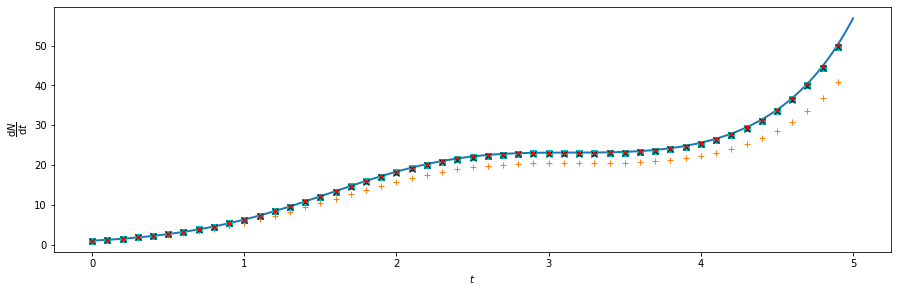

In [43]:
# kod

# počáteční podmínky
uH  = 1 # Heunova metoda
uSB = 1 # Metoda stredniho bodu
uE  = 1 # Eulerova metoda
uRK = 1 # Runge-Kutta

# konecny cas
T = 5

# casove kroky
tA = np.linspace(0,T,num=500)

# resime tuto rovnici f(x,y(x))=dy(x)/dx:
def f(x,y):
    return (1 + np.cos(x)) * y

h = 0.1 # delka kroku
exact = np.exp(tA + np.sin(tA)) # presne reseni


#stiff
#{
#f=inline('-15.*y','x', 'y'); % definice funkce f, plati ze u'=f(t,u)
#hranice mezi 0.13 a 0.14
#h=0.14; % pouzijeme krok h
# exact=exp(-15.*tA);
#%}

pocetKroku = 50 # celkovy pocet kroku
fig, ax = plt.subplots(figsize=(15,4.5))
ax.plot(tA,exact,linewidth=2) # zobrazime presne reseni


for i in range(pocetKroku):
    t = i / pocetKroku * T # spocteme cas odpovidajici kroku     

    # Eulerova metoda
    ax.plot(t,uE, marker="+", color='C1')
    # spocteme novou hodnotu promenne uE
    uE = uE+h*f(t,uE)

    # Metoda stredniho bodu
    ax.plot(t,uSB, marker="s", color='c')
    # spocteme novou hodnotu promenne uSB
    uSB = uSB+h*f(t+h/2,uSB+h/2*f(t,uSB))

    # Heunova metoda
    ax.plot(t,uH, marker="x", color='k')
    # spocteme novou hodnotu promenne uH
    uH = uH+h/2*(f(t,uH)+f(t+h,uH+h*f(t,uH)))

    # Runge-Kutta 4. rad
    ax.plot(t,uRK, marker=".", color='r')
    # spocteme novou hodnotu promenne uRK
    k1 = f(t,uRK)
    k2 = f(t+h/2,uRK+h/2*k1)
    k3 = f(t+h/2,uRK+h/2*k2)
    k4 = f(t+h,uRK+h*k3)
    uRK = uRK + h/6*(k1+2*k2+2*k3+k4)
    
ax.set_ylabel(r'$\dfrac{\mathrm{d}N}{\mathrm{d}t}$')
ax.set_xlabel(r'$t$')
#ax.set_xlim((4.5,5))

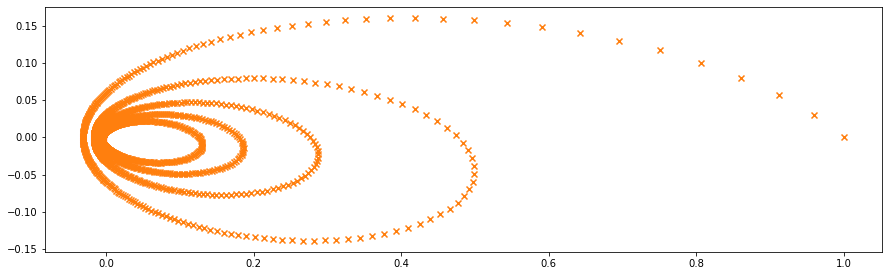

In [135]:
# kod

# demonstrace metody Runge-Kuta ctvrteho radu pro reseni soustavy dvou rovnic druheho radu

# problém dvou těles

T = 20 # budeme integrovat 20 sekund
h = 0.01 # pouzijeme krok h, vsimnete si ze je relativne veliky v porovnani s Eulerovou metodou

# pocatecni podminky
# array([x, dx/dt, y, dy/dt])
u = np.array([1, -0.3, 0, 0.3])


def f(u):
    w[0] = u[1]
    w[1] = -u[0]/(u[0]**2+u[2]**2)**(3/2)
    w[2] = u[3]
    w[3] = -u[2]/(u[0]**2+u[2]**2)**(3/2)
    return w
fig, ax = plt.subplots(figsize=(15,4.5))

pocetKroku = T / h # celkovy pocet kroku

for i in range(int(np.round(pocetKroku))):
    r = (u[0]**2+u[2]**2)**(1/2)
    h = 1e-1*r**2
    t = i / pocetKroku * T # spocteme cas odpovidajici kroku
    ax.scatter(u[0], u[2], marker="x", color='C1')
    k1 = f(u)    
    k2 = f(u+h/2*k1)
    k3 = f(u+h/2*k2)
    k4 = f(u+h*k3)
    u=u+h/6*(k1+2*k2+2*k3+k4)



<div class="alert alert-block alert-warning"><b>Cvičení 09.01: </b>Pomocí obdélníkové, lichoběžníkové a Simpsonovy metody numericky vypočtěte <a href="https://www.wolframalpha.com/input?i=integrate+sin%28x%29+from+1+to+5">integrál</a> $\int_{1}^{5} \sin(x)\,dx$.</div>